In [18]:
%matplotlib TkAgg
import mne
import numpy as np

Channels marked as bad:
none


In [14]:
kmeans = np.load('G:/My Drive/NeuroResearch/Data/eegCompress/processedData/kmeansSVD001.npz')
centers = kmeans['arr_0'].transpose()
indices = kmeans['arr_1'].squeeze()
start = kmeans['arr_2']

cols = len(indices)
print(centers.shape, indices.shape, start.shape)

(19, 128) (1100366,) (19,)


In [20]:
reconstruct = np.zeros((len(start), cols + 1))
reconstruct[:,0] = start

for i in range(0,cols):
    reconstruct[:,i + 1] = reconstruct[:, i] + centers[:, indices[i]]

print(reconstruct.shape)

(19, 1100367)


Creating RawArray with float64 data, n_channels=19, n_times=1100367
    Range : 0 ... 1100366 =      0.000 ...  4298.305 secs
Ready.


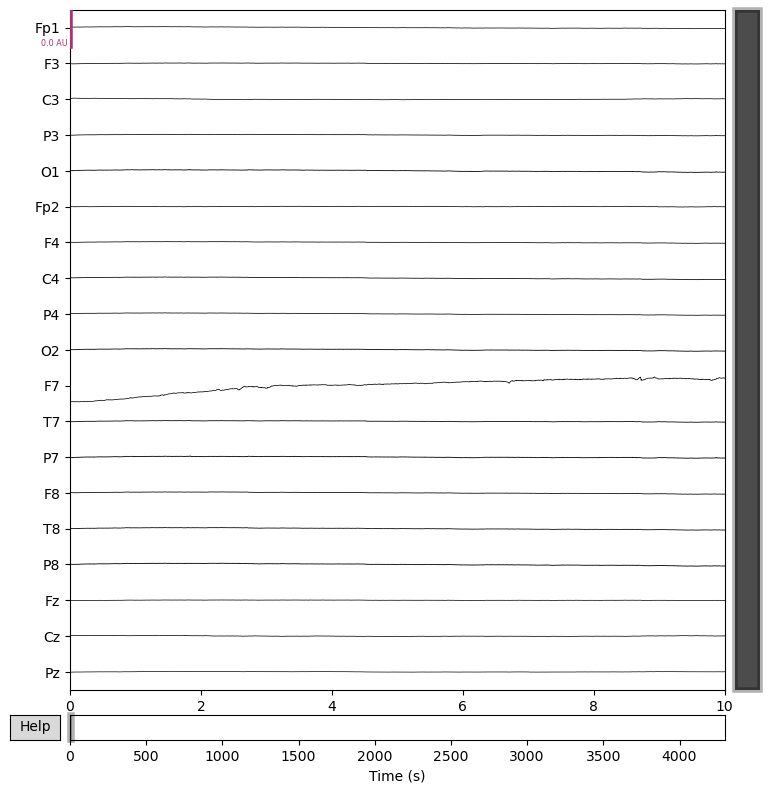

In [19]:
goodChannels = ['Fp1','F3','C3','P3','O1','Fp2','F4','C4','P4','O2','F7','T7','P7','F8','T8','P8','Fz','Cz','Pz']

info = mne.create_info(goodChannels, 256)
tempRaw = mne.io.RawArray(reconstruct, info)
tempRaw.plot()

In [21]:
reconstruct

array([[ 2.16661784e-05,  2.54426881e-05,  2.73601488e-05, ...,
         5.20813380e-04,  5.18513342e-04,  5.14484264e-04],
       [-2.45904479e-05, -1.98972764e-05, -1.83172500e-05, ...,
         6.24609152e-04,  6.21659696e-04,  6.16795110e-04],
       [ 8.10820172e-06,  4.88853613e-06,  2.84159645e-06, ...,
        -6.31456279e-04, -6.29657231e-04, -6.26157298e-04],
       ...,
       [-1.68810101e-05, -1.35310796e-05, -1.23787282e-05, ...,
         4.35917367e-04,  4.33830231e-04,  4.30384690e-04],
       [ 1.19629206e-06, -2.07518044e-06, -4.82871217e-06, ...,
        -7.12372753e-04, -7.11262081e-04, -7.07734921e-04],
       [-2.08686503e-05, -1.97687951e-05, -1.99265703e-05, ...,
         8.94706547e-05,  8.83022283e-05,  8.72133398e-05]],
      shape=(19, 1100367))